In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/dataset/house_price/train.csv', delimiter=',')
# first 10 values
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# general info and statistics of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Let's perform some data cleaning
#1. Missing value
missing_col = train_df.columns[train_df.isnull().any()]
train_df[missing_col].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Drop columns that has >= 50% of missing values
dropped_col = train_df.columns[train_df.isnull().sum() > .5 * train_df.shape[0]]
train_df.drop(labels = dropped_col, axis=1, inplace=True)
print(f"These are the dropped columns {dropped_col}")
print(f"These are the new columns of the training data {train_df.columns}, total {train_df.shape[1]} columns")

These are the dropped columns Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
These are the new columns of the training data Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'Firep

<Axes: >

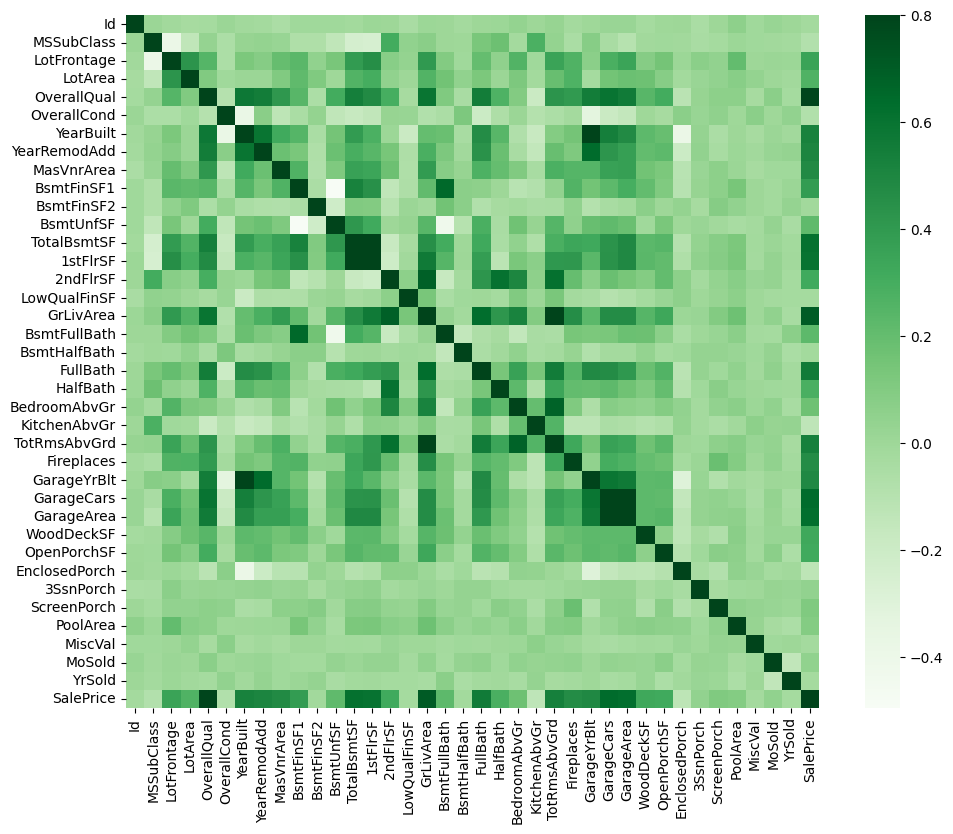

In [7]:
# Finding values that are strongly correlated with the target value 'SalePrice'
# Using Correlation Matrix
import seaborn as sns
corr_mat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True, cmap='Greens')

In [8]:
# pick top 10 features that have the strongest correlation with 'SalePrice'
k = 10
cols = corr_mat.nlargest(k+1, 'SalePrice').index
print("These are the columns that strongly correlate with SalePrice\n" + '\n'.join(cols))

These are the columns that strongly correlate with SalePrice
SalePrice
OverallQual
GrLivArea
GarageCars
GarageArea
TotalBsmtSF
1stFlrSF
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd


In [9]:
# Split the data based on those columns
new_df = train_df[cols]
new_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [10]:
# GarageCars and GarageArea are basically the same thing, we are going to keep the garage area 
# and remove garage cars since it is already represented by garage area
new_df.drop(labels=['GarageCars'], axis=1, inplace=True)
new_df.head()

<ipython-input-10-82b5e3def0ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(labels=['GarageCars'], axis=1, inplace=True)


,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,548,856,856,2,8,2003,2003
1,181500,6,1262,460,1262,1262,2,6,1976,1976
2,223500,7,1786,608,920,920,2,6,2001,2002
3,140000,7,1717,642,756,961,1,7,1915,1970
4,250000,8,2198,836,1145,1145,2,9,2000,2000


In [11]:
# let's see if there's any missing values
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   YearBuilt     1460 non-null   int64
 9   YearRemodAdd  1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [12]:
# Splitting train data and target data
X = new_df.iloc[:,:(len(new_df.columns)-1)]
y = new_df.iloc[:,-1]
# Check their shapes. X should have 80 columns
print(f"X has {X.shape[0]} records with {X.shape[1]} features")
print(f"y has this shape {y.shape}")

X has 1460 records with 9 features
y has this shape (1460,)


In [13]:
# Splitting the data into train set, cross_validation set, and test set
# the ration will be 60% 20% 20%
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_csv, X_test, y_csv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
del X_,y_
print(f"X train shape {X_train.shape} and y train shape {y_train.shape}")
print(f"X csv shape {X_csv.shape} and y csv shape {y_csv.shape}")
print(f"X test shape {X_test.shape} and y test shape {y_test.shape}")

X train shape (1168, 9) and y train shape (1168,)
X csv shape (146, 9) and y csv shape (146,)
X test shape (146, 9) and y test shape (146,)


In [14]:
from sklearn.preprocessing import StandardScaler
# Scaling the train data
train_scaler = StandardScaler()
scaled_Xtrain = train_scaler.fit_transform(X_train)
scaled_Xtrain

array([[-0.47185427, -0.82044456, -0.40709315, ..., -1.05556573,
        -0.96456591, -0.45546896],
       [-0.04456195, -0.08893368,  0.08317013, ...,  0.7736639 ,
         0.27075534,  0.71860895],
       [-1.24874939, -0.82044456, -1.39525026, ..., -1.05556573,
        -1.58222654, -1.98829291],
       ...,
       [-0.86030183, -0.82044456, -1.26553079, ..., -1.05556573,
        -0.96456591, -0.52069551],
       [ 0.11016966,  0.64257719, -0.19343756, ..., -1.05556573,
         0.27075534, -1.72738671],
       [-0.09635496,  0.64257719,  0.0526479 , ...,  0.7736639 ,
         0.27075534,  1.17519481]])

In [15]:
from sklearn.metrics import mean_squared_error
# train our data
reg = LinearRegression()
reg.fit(scaled_Xtrain, y_train)
print(f"Error on training set {mean_squared_error(reg.predict(scaled_Xtrain),y_train)}")
scaled_Xcsv = train_scaler.transform(X_csv)
print(f"Error on csv set {mean_squared_error(reg.predict(scaled_Xcsv),y_csv)}")
scaled_Xtest = train_scaler.transform(X_test)
print(f"Error on test set {mean_squared_error(reg.predict(scaled_Xtest),y_test)}")

Error on training set 242.84691820961567
Error on csv set 216.37580479987312
Error on test set 241.01950849093086


yhat shape (146,) is the same as y_test shape(146,)


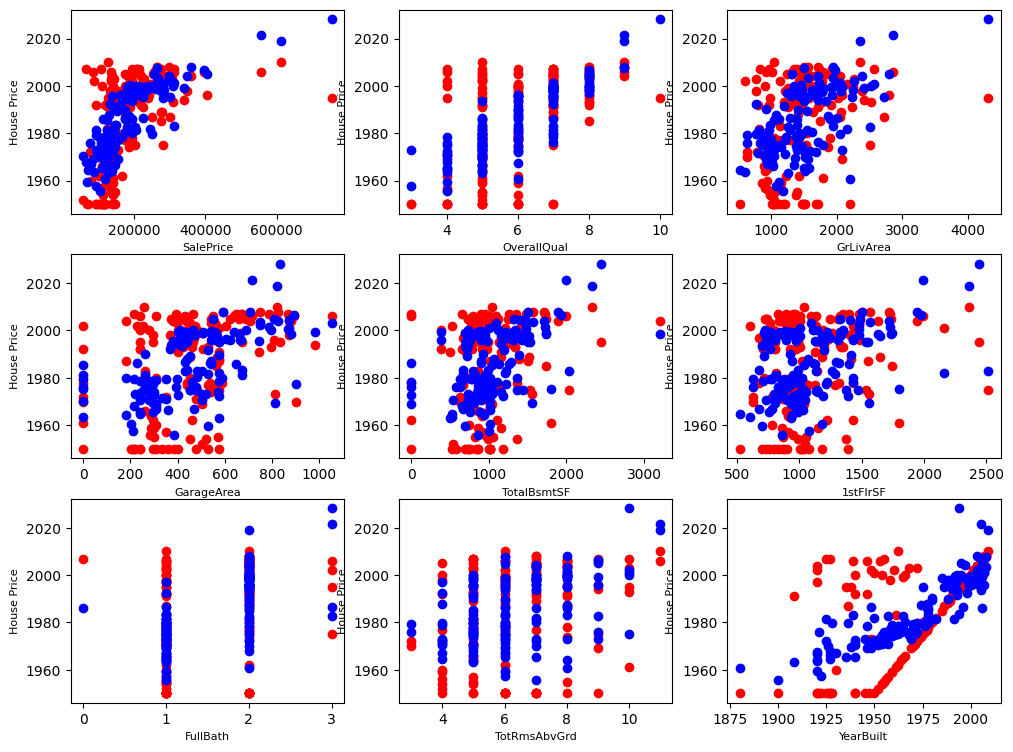

In [16]:
# plot on overall Qual
# plt.scatter()
yhat = reg.predict(scaled_Xtest)
 # the shape shoul be equal to (146, ) the same as y test
print(f"yhat shape {yhat.shape} is the same as y_test shape{y_test.shape}")

# let's plot
fig,axs = plt.subplots(3,3,figsize=(12, 9))
cols = X_train.columns
col_it = 0
for i in range(3):
  for j in range(3):
    # make a plot
    axs[i,j].scatter(X_test[cols[col_it]], y_test, color="red")
    # set x-axsis label
    axs[i,j].set_xlabel(cols[col_it], fontsize = 8)
    # set y-axsis label
    axs[i,j].set_ylabel("House Price", fontsize=8)
    axs[i,j].scatter(X_test[cols[col_it]], yhat, color="blue")
    col_it += 1

In [17]:
# let's try to use non-linear regression (adding polynomial features)
from sklearn.preprocessing import PolynomialFeatures
k = 5 # maks 5 degree of polynomial
scores = []
models = []
scalers = []
polies = []
for i in range(1, k+1):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  xtrain_degree = poly.fit_transform(X_train)
  polies.append(poly)
  # scale data xtrain
  scaler = StandardScaler()
  scaled_xtrain_deg = scaler.fit_transform(xtrain_degree)
  scalers.append(scaler)
  # create the model
  reg = LinearRegression()
  reg.fit(scaled_xtrain_deg, y_train)
  models.append(reg)
  # scale the csv testget the error
  csv_degree = poly.transform(X_csv)
  csv_scaled = scaler.transform(csv_degree)
  scores.append(mean_squared_error(reg.predict(csv_scaled),y_csv))

print(f"Scores from degree 1 to 5\n {scores}")


Scores from degree 1 to 5
 [216.37580479987315, 191.47577416201, 252.51474383683683, 1.4480166563567462e+19, 45141968111.17372]


In [18]:
# as you can see the best degree to choose is degree of 2
# lets predict using x test value
index = np.argmin(scores)
best_model = models[index]
scaler = scalers[index]
poly = polies[index]
test_poly = poly.transform(X_test)
scaled_test_poly = scaler.transform(test_poly)
yhat_test = best_model.predict(scaled_test_poly)

# let's see the error
print(f"The error for y test on model with degree of 2 is {mean_squared_error(yhat_test, y_test)}")

The error for y test on model with degree of 2 is 228.28628128599397


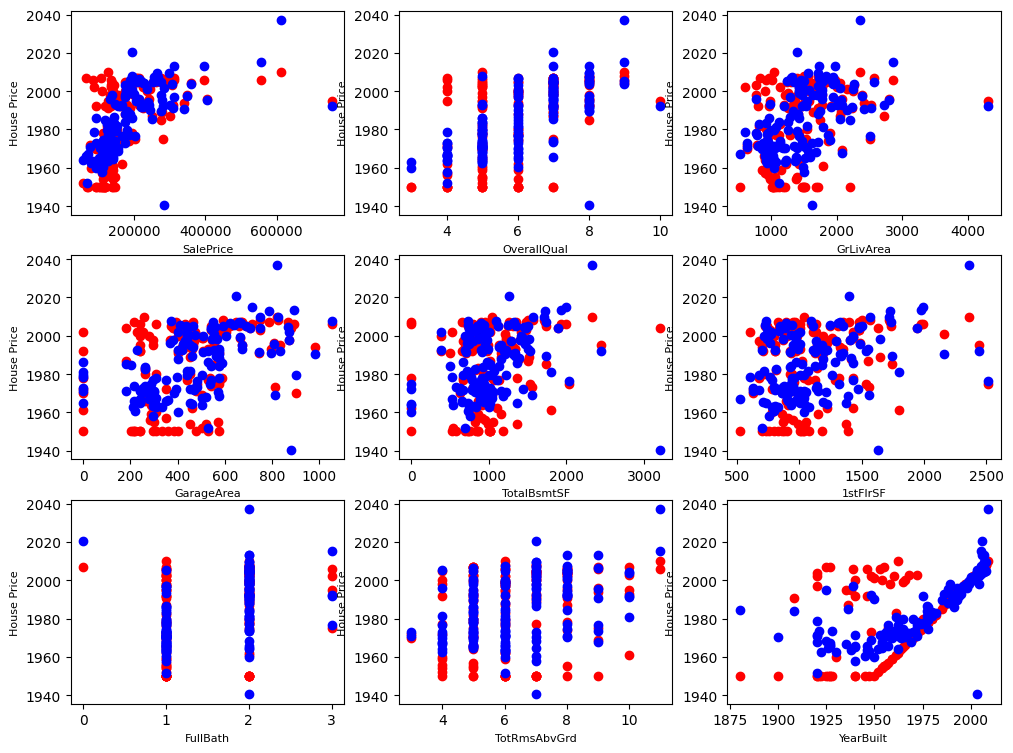

In [19]:
# let's plot the result
# let's plot
fig,axs = plt.subplots(3,3,figsize=(12, 9))
cols = X_train.columns
col_it = 0
for i in range(3):
  for j in range(3):
    # make a plot
    axs[i,j].scatter(X_test[cols[col_it]], y_test, color="red")
    # set x-axsis label
    axs[i,j].set_xlabel(cols[col_it], fontsize = 8)
    # set y-axsis label
    axs[i,j].set_ylabel("House Price", fontsize=8)
    axs[i,j].scatter(X_test[cols[col_it]], yhat_test, color="blue")
    col_it += 1